In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings


warnings.filterwarnings('ignore')

In [18]:
tickerSymbol = "TATASTEEL.NS"
df = yf.Ticker(tickerSymbol)
df

yfinance.Ticker object <TATASTEEL.NS>

In [19]:
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=730)
test_data = yf.download(tickerSymbol, start=start_date, end=end_date)
tomorrow = end_date + datetime.timedelta(days=1)
prices = df.history(start=start_date, end=end_date).Close
prices

[*********************100%%**********************]  1 of 1 completed


Date
2022-04-11 00:00:00+05:30    124.765800
2022-04-12 00:00:00+05:30    121.306465
2022-04-13 00:00:00+05:30    121.237556
2022-04-18 00:00:00+05:30    123.038437
2022-04-19 00:00:00+05:30    121.889923
                                ...    
2024-04-02 00:00:00+05:30    164.649994
2024-04-03 00:00:00+05:30    163.649994
2024-04-04 00:00:00+05:30    163.399994
2024-04-05 00:00:00+05:30    163.350006
2024-04-08 00:00:00+05:30    165.199997
Name: Close, Length: 492, dtype: float64

In [20]:
returns = prices.pct_change().dropna()
returns

Date
2022-04-12 00:00:00+05:30   -0.027727
2022-04-13 00:00:00+05:30   -0.000568
2022-04-18 00:00:00+05:30    0.014854
2022-04-19 00:00:00+05:30   -0.009335
2022-04-20 00:00:00+05:30   -0.009310
                               ...   
2024-04-02 00:00:00+05:30    0.009194
2024-04-03 00:00:00+05:30   -0.006073
2024-04-04 00:00:00+05:30   -0.001528
2024-04-05 00:00:00+05:30   -0.000306
2024-04-08 00:00:00+05:30    0.011325
Name: Close, Length: 491, dtype: float64

Text(0.5, 1.0, 'stock prices')

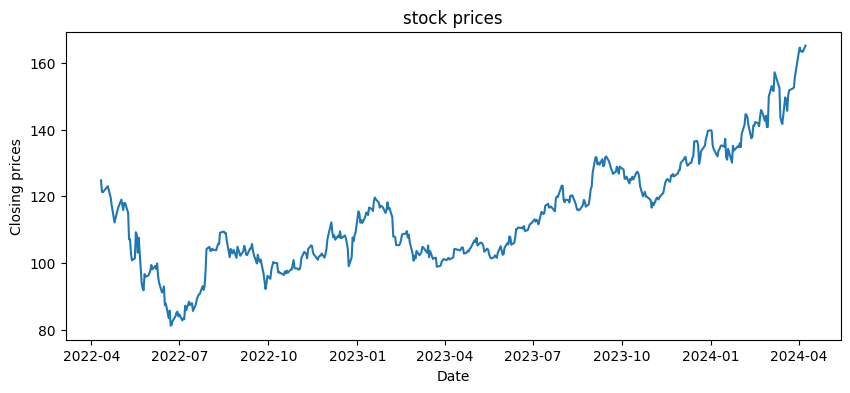

In [21]:
#plotting the stock prices
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing prices")
plt.xlabel("Date")
plt.title("stock prices")

Text(0.5, 1.0, 'Returns of TATASTEEL.NS')

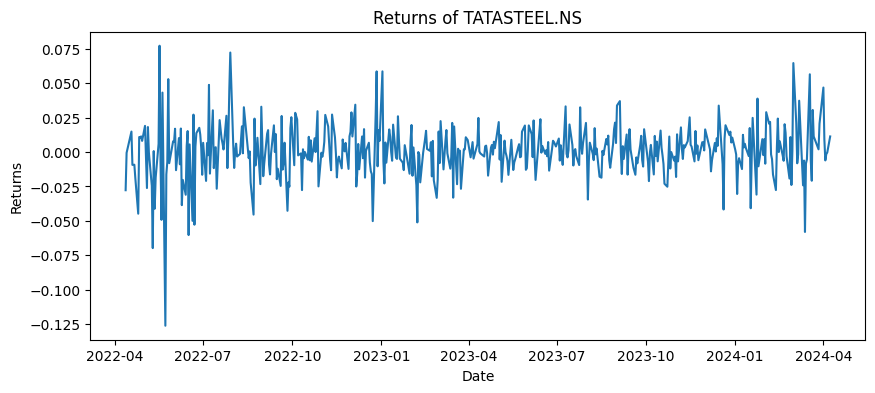

In [22]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title(f"Returns of {tickerSymbol}")

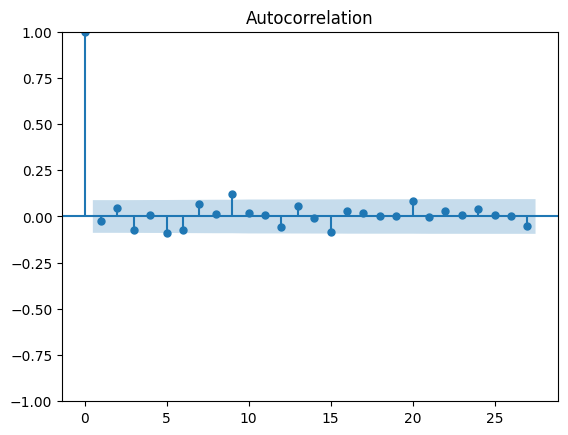

In [23]:
#plotting acf and pacf
#acf is use for moving average and pacf is use for ar(autoregressive)

plot_acf(returns)
plt.show()


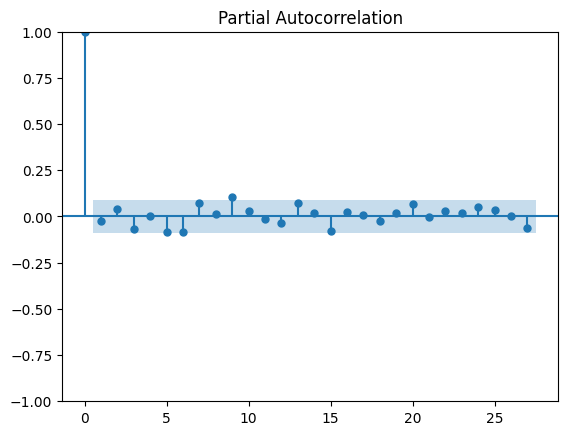

In [24]:
plot_pacf(returns, method='ywm')
plt.show()

In [25]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

tomorrow = end_date + datetime.timedelta(days=1)
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(test_data['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2523.490, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2379.267, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2196.861, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2198.855, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2198.855, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2200.485, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.969 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  492
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1096.430
Date:                Mon, 08 Apr 2024   AIC                           2196.861
Time:                        17:47:51   BIC                           2205.250
Sample:                             0   HQIC                          2200.155
                                - 492                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9897      0.011    -91.646      0.000      -1.011      -0.969
sigma2         5.1009      0.180     28.397      0.000       4.749       5.453
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               499.53
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.31
Prob(H) (two-sided):                  0.10   Kurtosis:                         7.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
#building the model of ARIMA (2 years data)

model = ARIMA(prices,order=(0,2,1))
fitted = model.fit()
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  492
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1078.953
Date:                Mon, 08 Apr 2024   AIC                           2161.906
Time:                        17:47:51   BIC                           2170.294
Sample:                             0   HQIC                          2165.200
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9910      0.010    -94.845      0.000      -1.011      -0.971
sigma2         4.7483      0.172     27.577      0.000       4.411       5.086
Ljung-Box (L1) (Q):                   0.07   Jarque-

In [27]:
#predicting the next day price
next_day_price = fitted.forecast (100,alpha=0.05) #(we can predict upto 100 days with alpha = 0.05 95% confidence level of tommorow predicted prices)
print(next_day_price)

492    165.509879
493    165.819761
494    166.129642
495    166.439524
496    166.749406
          ...    
587    194.948654
588    195.258536
589    195.568418
590    195.878299
591    196.188181
Name: predicted_mean, Length: 100, dtype: float64


In [28]:
predicted_price = next_day_price.values[0]
print(f"The predicted price for tomorrow:", predicted_price)

The predicted price for tomorrow: 165.5098787915656


In [29]:
# # Importing mean_absolute_error from sklearn.metrics
# from sklearn.metrics import mean_absolute_error

# # Define the actual prices for the next day
# actual_price_next_day = prices.iloc[-1]

# # Calculate MAE
# mae = mean_absolute_error([actual_price_next_day], [predicted_price])
# print("Mean Absolute Error (MAE):", mae)

In [30]:
# Get the actual values for the next day
actual_price = prices[-1]

# Calculate MAE
mae = np.abs(predicted_price - actual_price)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.30988184332341007


In [31]:
# # Plotting actual prices vs predicted prices
# plt.figure(figsize=(10, 6))
# plt.plot([tomorrow], [actual_price], marker='o', color='black', label='Actual Price')
# plt.plot([tomorrow], [predicted_price], marker='o', color='green', label='Predicted Price')
# plt.title("Actual vs Predicted Prices for TSLA")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.grid(True)
# plt.show()


Stored 'model_mae_scores' (dict)


Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

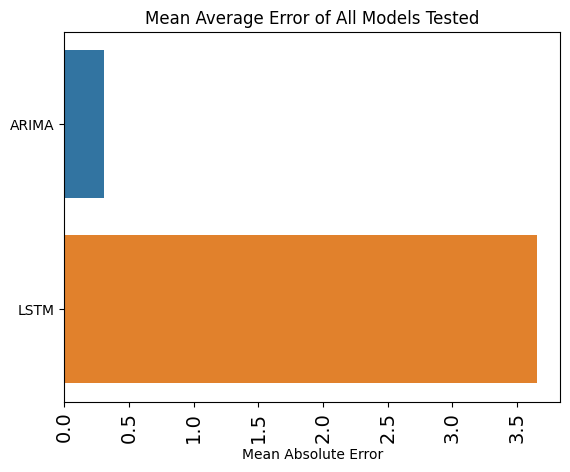

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

model_mae_scores = {'ARIMA': '0.30988184332341007' , 'LSTM': '3.651884375829816'}
# Store MAE scores
%store model_mae_scores

%store -r model_mae_scores
mae_series = pd.Series(model_mae_scores)
model_mae_scores

# Sort vales for clean bar chart
order = mae_series.sort_values()

import seaborn as sns
# Create bar chart for to show MAE of all models side by side
sns.barplot(x=order.values, y = order.index, orient='h')
plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')